## 1. Cropping an Image in a circular way
**Approach:**

* If you have an L mode image, the image becomes grayscale. So we create a new image with mode “L”.
* An image is created with a white circle in the middle with dimensions same as the input image.
* Convert a new image to an array.
* Convert original image from an array.
* Stack these two arrays together to crop out only the circular middle part.

In [108]:
from PIL import Image, ImageDraw , ImageFilter
import numpy as np

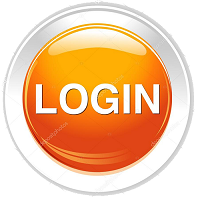

original image mode:  RGBA


In [96]:
ori_img = Image.open('login2.png')
display(ori_img)

print("original image mode: ", ori_img.mode)

After opening the image we need to create a new blank image with the same size.

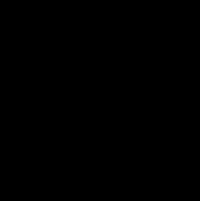

In [87]:
ori_img_size = ori_img.size

# now we need to create a new blank image.
temp_img = Image.new(size= ori_img_size , mode='L')
display(temp_img)

after creating a new blank image. we need to draw an circle on this image with white color 

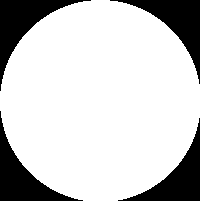

In [88]:

draw = ImageDraw.Draw(temp_img, mode='L')

# now we need the the height and width of the image.
width = temp_img.width
height = temp_img.height

# also need a bounding box in which we want to create a circle
bbox = [(0,0),(width,height)]

start_angle , end_angle = 0, 360

color = 255
# now we need to draw a circle with the help of the draw.pieslice() method.
draw.pieslice(bbox, start_angle, end_angle, fill=color, outline='white')


# or we can use also 
# draw.ellipse(bbox, fill=255)

# now we need to display the image
display(temp_img)

So until now what we have done:
1. We opened our original image and stored it in ori_img.
2. We made a new blank image in 'L' mode in black color, Ths image is the alpha layer for our original image. \
    alpha: alpha layer is used to apply the opacity of the color or image. In our alpha layer we have full opacity for the white circle area and the remaining area is black mean no opacity, this area will not be visiable and it will be transparence.
3. after making the black alpha layer we need make a circle for that we can use `draw.ellipse()` or `draw.pieslice()` methods.
4. Now after creating the white circle on the alpha layer image, we need to put this lapha layer on the ori_img by using the `.putalpha()` method.


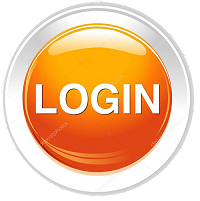

In [107]:
# putting the alpha layer on the original image (ori_img) , this is called the masking or blending operation.
# we can called out temp_img as the mask_layer
mask_layer = temp_img
# from now we are reffering our temp_img as the mask_layer

# putting thie alpha/ mask layer on the ori_img.
ori_img.putalpha(mask_layer)

# now our image has been cropped , now we will display this 
display(ori_img)

Note: our cropped image has some roughness on the border of the cropped area. We can avoid this problem by doing these steps.

**Remove border roughness** 
1. make the masked layer with (2 or 3 or 4 or 5 ) time bigger than the our image which is need to be cropped.
2. make the circle on the mask layer then resize it into small size which is same as the original image with `Image.ANTIALIAS` attribute of the resizing by doing this operation we will not having the roughness on the border.
3. now using this new mask layer on the original image.

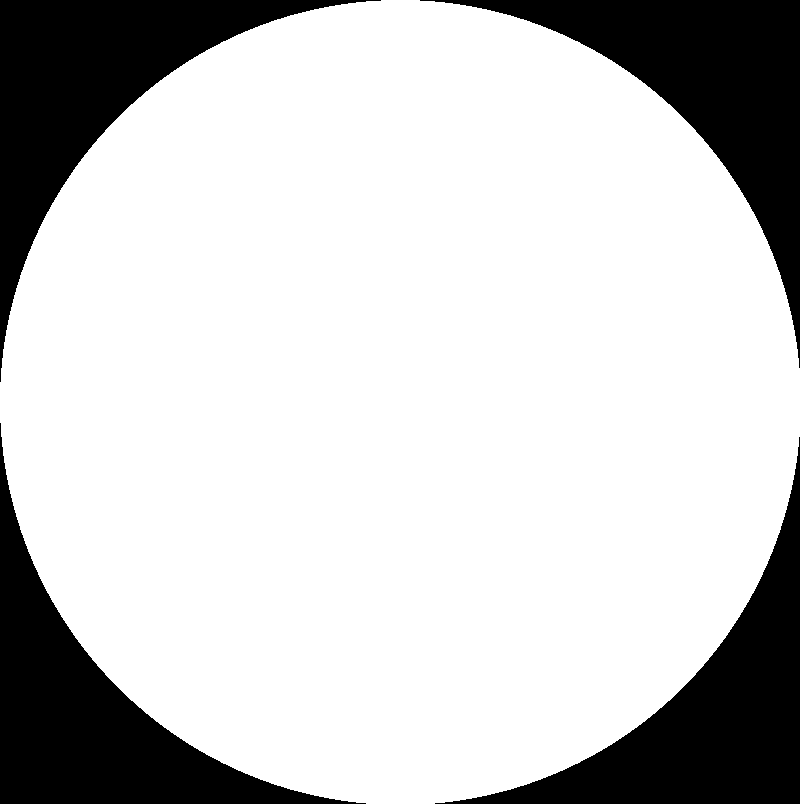

In [118]:
# now we will make a bigger mask layer and remove the roughness of the border
size_time = 4
bigsize = (ori_img_size[0] * size_time, ori_img_size[1] * size_time)

# creating the mask with bigsize
mask2 = Image.new('L' , bigsize)

# drawing the visible area (white area) on this mask2 layer
draw2 = ImageDraw.Draw(mask2)
draw2.ellipse((0,0) + bigsize , fill=255)

# now we will display our bigsized image before making it small
display(mask2)

As we can see that we have mask layer of a big size , now we need to resize it by using the `Image.ANTIALIAS` attribute

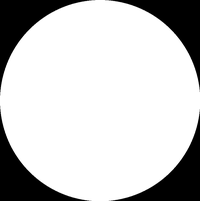

In [119]:
# making the mask2 layer image in small size
mask2 = mask2.resize(ori_img_size, Image.ANTIALIAS)
# Image.ANTIALIAS will be passed to the resampling parameter of the .resize() method.
# now again, we will display our image.

display(mask2)

Note: Now this time we dont see any roughness on the border of the white circle. if we use this layer on the ori_img we won't see roughness there also.

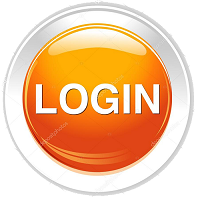

In [122]:
# Since our ori_img has been already masked so we need to again load it.
ori_img = Image.open('login2.png')
display(ori_img)

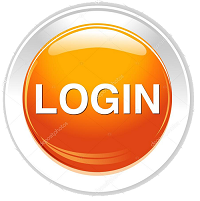

In [123]:
# now put the mask2 on it
ori_img.putalpha(mask2)
# now displaying it again
display(ori_img)

Now we don't see any roughness on the border also. Now this image is ready be saved on the local storage.

In [124]:
# saving the image.
ori_img.save("masked_logo.png")

### Defining function to crop an image in circular way

In [128]:
def crop_circle(image):
    from PIL import Image, ImageDraw
    # making a 
    bigsize = (image.width * 5, image.height*5)
    
    mask_layer = Image.new("L", bigsize)
    # now we have a masked layer which is 4 times greater than the original image.
    # now we have mask layer, so we need to draw a circle on it
    
    draw = ImageDraw.Draw(mask_layer)
    draw.ellipse((0,0) + bigsize, fill = 255)
    # after making the white circular maksed area we need to resize it wit antialias property
    
    mask_layer = mask_layer.resize(image.size, Image.ANTIALIAS)
    
    # we need to put this on the image. 
    image.putalpha(mask_layer)
    
    return image
    

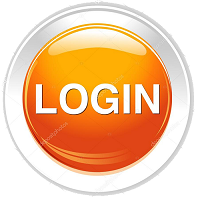

In [126]:
ori_img = Image.open('login2.png')
display(ori_img)

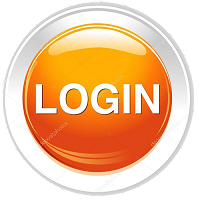

In [129]:
crop_circle(ori_img)

----
----
## 2. Convert png to icon
In this section we will convert our png image into an icon.

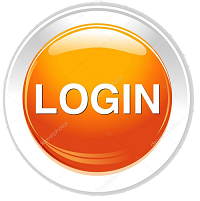

In [130]:
# to do this first of all we need to open the file 
# then we need to resize the image into icon size (48x48) or (64x64) image.

icon_size = (48,48)

ori_img = Image.open('Login_icon.png')
display(ori_img)

after loading the image we need to resize it. 

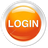

In [131]:
# resizing.
icon = ori_img.resize(icon_size, Image.ANTIALIAS)
# displaying the small size icon image
display(icon)

In [132]:
#now we need to save it into local storage.
icon.save("login.ico", "ICO")

### Convert png to ico function

In [53]:
#C:\WorkData\Programming\Python\Scripts\small apps bash

#f = input("Enter File name: ")

def png_to_ico(filepath ,size = (48,48)):
    from os.path import split, splitext , join
    from PIL import Image
    """
    filepath: It is the image file address on the local storage address.

    """
    icon_size = size
    print("file path: ", filepath)
    
    # now we need the file name.
    image_name = split(splitext(filepath)[0])[1]
    
    image_dir = split(filepath)[0]
    print("image name: ", image_name)
    
    # fitrst we need to open the image.
    image = Image.open(filepath) # format of the file will be located from the extension of the file.
    
    # now we need to make it small size
    image.resize(icon_size,  Image.ANTIALIAS)
    
    icon_dir = join(image_dir, f"{image_name}.ico")
    
    image.save(icon_dir, 'ICO')
    
    print(" png -------> ico: Converted")
    
#png_to_ico(f)

In [50]:
def get_size(size , wf = .50, hf = .50):
    
    # size will be a tuple of width and height
    
    low_thershold = 30
    high_threshold = 90
    
   # print("\n\nfraction: ", wf, hf)
    width = size[0]
    height = size[1]
    
    if width < 50 and height < 50:
        return size
    
    
    aspect = float()
    if height != 0 or width != 0 :
        
         aspect = width/height
    
    else:
        print("zero division ", height, width)
        return -1
   
    
    if aspect > 1 or aspect < 1:
        # then it means image has different width and size.
        # now here we need to do some computation
        # now we need to use the .50 method on each itearation
        
        nwidth = width - width*wf
        nheight = height - height*hf
        
        if not 40 < nwidth < 70:
            # if our icon width is do not meet this requirment then we will go here
            if nwidth < 40:
                wf -= .05
            else:
                wf += .05
            #print("width fraction: ",wf)
        else:
            pass
        
        if not 40 < nheight < 70:
            # if our icon height is do not meet this requirment then we will go here
            if nwidth < 40:
                hf -= .05
            else:
                hf += .05
            #print("height fraction: ",hf)
            
        else:
            pass
            
        if low_thershold < nwidth < high_threshold   and low_thershold < nheight < high_threshold:
            return int(nwidth),int(nheight)
        
        #print("New size input: ", int(nwidth), int(nheight))
   
        return get_size((int(nwidth), int(nheight)), wf, hf)
        
    else:
        return (48,48)
    
    # now we need to check the aspect ratio
    

In [46]:
get_size(size = (500,400))

(44, 35)

In [187]:
if not 40 < a < 60:
    print("True")

True


In [40]:
import os
from PIL import Image

In [41]:
root = "./png"
pngs = os.listdir("./png")

In [55]:
for files in pngs:
    path = os.path.normpath(os.path.join(root,files))
    print(path)
    
    image = Image.open(path)
    
    size = get_size(image.size)
    print("input size: ",image.size )
    print("returned size: ", size)
    print("\n")
    
    png_to_ico(path, size)

png\AddUser.png
input size:  (96, 96)
returned size:  (48, 48)


file path:  png\AddUser.png
image name:  AddUser
 png -------> ico: Converted
png\add_user_group_woman_man_40px.png
input size:  (40, 40)
returned size:  (40, 40)


file path:  png\add_user_group_woman_man_40px.png
image name:  add_user_group_woman_man_40px
 png -------> ico: Converted
png\briefcase_settings_96px.png
input size:  (96, 96)
returned size:  (48, 48)


file path:  png\briefcase_settings_96px.png
image name:  briefcase_settings_96px
 png -------> ico: Converted
png\circled_user_male_skin_type_7_48px.png
input size:  (48, 48)
returned size:  (48, 48)


file path:  png\circled_user_male_skin_type_7_48px.png
image name:  circled_user_male_skin_type_7_48px
 png -------> ico: Converted
png\circled_user_male_skin_type_7_96px.png
input size:  (96, 96)
returned size:  (48, 48)


file path:  png\circled_user_male_skin_type_7_96px.png
image name:  circled_user_male_skin_type_7_96px
 png -------> ico: Converted
png\eye_3